<a href="https://colab.research.google.com/github/Rutujaborawake29/LGMVIP-DataScience/blob/main/lgmvip_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LETS GROW MORE VIRTUAL INTERNSHIP PROGRAM**

Data Science Internship

Author-Rutuja Borawake

Level-Beginner

Task Name-Stock Market Prediction And Forecasting Using Stacked LSTM


# **Importing Libraries**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# **Reading Dataset**

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [7]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [8]:
df.shape

(2035, 8)

In [9]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [12]:
stk=df.copy()
stk['Date'].min()
stk['Date'].max()

'2018-09-28'

In [13]:
stk.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [14]:

stk['Date'] = pd.to_datetime(stk['Date'])

In [15]:
stk.columns


Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [16]:
stk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [17]:
stk['Month Year'] = stk['Date'].apply(lambda x: x.strftime ('%y-%m'))
stk['Year'] = stk['Date'].apply(lambda x: x.strftime ('%y'))
stk.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Month Year,Year
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,18-09,18
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,18-09,18
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,18-09,18
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,18-09,18
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,18-09,18


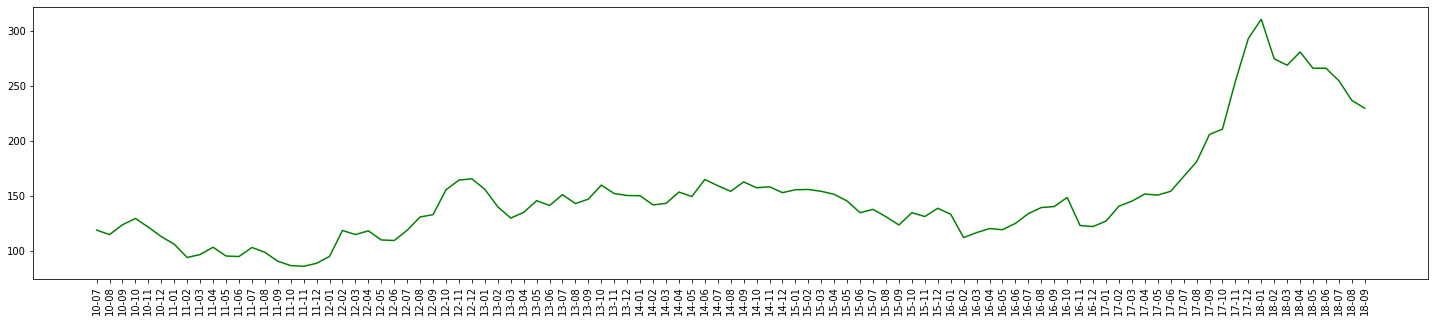

In [18]:
a = stk.groupby('Month Year')['Close'].mean()
plt.figure(figsize=(25,5))
plt.plot(a, color = 'green')
plt.xticks(rotation = 'vertical')
plt.show()

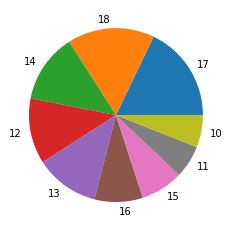

In [19]:
pc = stk[['Year', 'Total Trade Quantity']]
grp_pc = pc.groupby('Year')['Total Trade Quantity'].mean().sort_values(ascending = False).reset_index()

plt.pie(grp_pc['Total Trade Quantity'], labels=grp_pc['Year'])
plt.show()

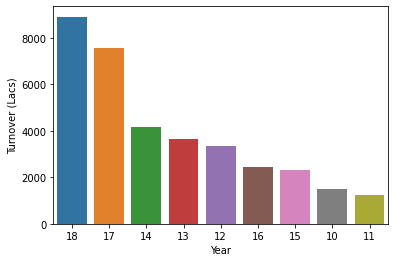

In [20]:
trd = stk[['Year','Turnover (Lacs)']]
a = trd.groupby('Year')['Turnover (Lacs)'].mean().sort_values(ascending = False).reset_index()

sns.barplot(a['Year'], a['Turnover (Lacs)'])
plt.show()

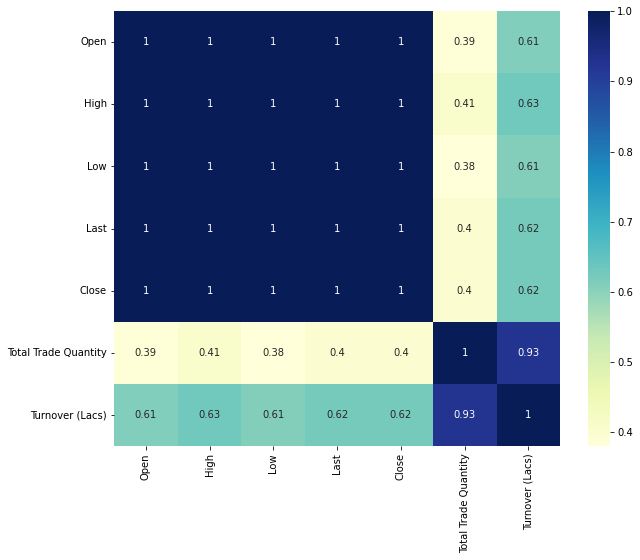

In [21]:
plt.figure(figsize = (10,8))
sns.heatmap(stk.corr(), annot = True, cmap = 'YlGnBu')
plt.show()


In [22]:
stk.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)', 'Month Year', 'Year'],
      dtype='object')

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
x = stk[['Close', 'Total Trade Quantity']]
y = stk['Turnover (Lacs)']

In [25]:
x.head()

,Close,Total Trade Quantity
0,233.75,3069914
1,233.25,5082859
2,234.25,2240909
3,236.10,2349368
4,233.30,3423509


In [26]:
y.head()

0     7162.35
1    11859.95
2     5248.60
3     5503.90
4     7999.55
Name: Turnover (Lacs), dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [28]:
lr=LinearRegression()
lr.fit(X_train, y_train)
X_train.shape, X_test.shape
y_train.shape, y_test.shape


((1424,), (611,))

In [29]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [30]:
y_train.shape, y_test.shape
lr.score(X_test, y_test)
y_train_pred = lr.predict(X_train)
y_train_pred
y_test_pred = lr.predict(X_test)
y_test_pred

array([ 2.73775308e+03,  4.50817891e+03,  3.72316597e+03,  2.11214997e+03,
        4.24964702e+01,  2.42572954e+03,  3.18558586e+03,  9.66124673e+03,
        1.66627274e+03,  3.04891271e+03,  2.32553104e+03,  1.43517603e+03,
        1.88589004e+03,  9.54420313e+03,  3.32125864e+03,  8.76940837e+03,
        2.84122329e+03,  5.64135203e+03,  1.27751069e+03, -8.99509965e+02,
        3.35318824e+03,  1.40461068e+03,  6.13604561e+02,  3.38142280e+03,
        3.43720507e+03, -1.34771445e+02,  6.43018799e+03,  2.06765290e+03,
        1.34719440e+04, -2.38452135e+02,  3.62139186e+03,  1.45618429e+04,
        1.21039238e+04,  2.75548142e+03,  1.60695077e+03,  2.04365524e+03,
        4.07812323e+03,  1.48005154e+03,  6.47946748e+02,  1.91518806e+03,
        2.29614885e+03,  2.12755631e+03,  1.00404802e+04,  1.93956912e+03,
        9.84648955e+02,  7.83846778e+03,  6.91725881e+03,  7.25086682e+03,
        6.96373851e+03,  7.97650374e+03,  5.12292885e+02,  1.56403165e+03,
        1.88929548e+03, -

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
print("R2Score : " ,r2_score(y_test, y_test_pred)) 
print("mean_absolute_error : ",mean_absolute_error(y_test, y_test_pred))
print("mean_squared_error : " ,mean_squared_error(y_test, y_test_pred)) 
print("Root mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2Score :  0.9395450438291394
mean_absolute_error :  710.3965101273103
mean_squared_error :  1681519.7596361295
Root mean_squared_error :  1296.734267163527


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) 

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train_std,y_train)
rf_tree_y_pred = rf_tree.predict(X_train_std)
print("Accuracy: {}".format(rf_tree.score(X_train_std,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))


Accuracy: 0.9975558282136721
R squared: 0.9975558282136721
